# PART 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

In [2]:
sData = pd.read_csv("Signals.csv")
sData.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
sData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
print('Number of missing values in all columns-\n', sData.isnull().sum())

Number of missing values in all columns-
 Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


In [5]:
duplicate = sData[sData.duplicated(keep = 'last')]
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1562,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
sData.drop_duplicates(inplace=True)
sData

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

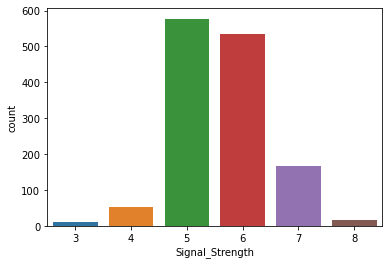

In [7]:
sns.countplot(x=sData.iloc[:,-1],data=sData.iloc[:,0:-1])

* The Dataset contains 1599 entries having 11 columns and 1 target column 
* The tagret column Signal_Strength contains 6 classification categories 3,4,5,6,7,8
* Signal_Strength 5 and 6 occurs most 
* Signal_Strength 3 and 8 occurs lowest 

In [8]:
X=sData.iloc[:,0:-1]
Y=sData.iloc[:,-1]

In [9]:
Y=Y-3 #now Signal_Strength categories become 0,1,2,3,4,5

In [10]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

In [11]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)

X_train (951, 11)
X_test (408, 11)
Y_train (951,)
Y_test (408,)


In [12]:
print(X_train.max())
print(X_train.min())
print(X_test.max())
print(X_test.min())

Parameter 1      15.90000
Parameter 2       1.58000
Parameter 3       1.00000
Parameter 4      15.50000
Parameter 5       0.61000
Parameter 6      72.00000
Parameter 7     289.00000
Parameter 8       1.00315
Parameter 9       4.01000
Parameter 10      2.00000
Parameter 11     14.90000
dtype: float64
Parameter 1     4.6000
Parameter 2     0.1600
Parameter 3     0.0000
Parameter 4     1.2000
Parameter 5     0.0120
Parameter 6     1.0000
Parameter 7     6.0000
Parameter 8     0.9902
Parameter 9     2.7400
Parameter 10    0.3300
Parameter 11    8.4000
dtype: float64
Parameter 1      15.60000
Parameter 2       1.24000
Parameter 3       0.79000
Parameter 4      15.40000
Parameter 5       0.61100
Parameter 6      66.00000
Parameter 7     155.00000
Parameter 8       1.00369
Parameter 9       4.01000
Parameter 10      1.95000
Parameter 11     14.00000
dtype: float64
Parameter 1     5.00000
Parameter 2     0.12000
Parameter 3     0.00000
Parameter 4     0.90000
Parameter 5     0.03800
Parameter 

In [13]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
print(X_train.max())
print(X_train.min())

print(X_test.max())
print(X_test.min())

0.9905136977475835
0.0
0.9872099169525562
0.0


In [14]:
y_train = tensorflow.keras.utils.to_categorical(Y_train, num_classes=6)
y_test = tensorflow.keras.utils.to_categorical(Y_test, num_classes=6)

In [15]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
        
    model = Sequential()
    model.add(Dense(50,input_shape=(11,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(learning_rate=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])    
    # Fit the model
    history = model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 1,validation_data=(X_test, y_test))
    return history

In [16]:
lr = 0.01
Lambda = 0
history=train_and_test_loop(20, lr, Lambda)

Epoch 1/20
10/10 [==============================] - 1s 31ms/step - loss: 1.7172 - accuracy: 0.4206 - val_loss: 1.5713 - val_accuracy: 0.4314
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 1.4622 - accuracy: 0.4217 - val_loss: 1.3383 - val_accuracy: 0.4314
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 1.2815 - accuracy: 0.4217 - val_loss: 1.2461 - val_accuracy: 0.4314
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 1.2239 - accuracy: 0.4437 - val_loss: 1.2290 - val_accuracy: 0.5074
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 1.2059 - accuracy: 0.4848 - val_loss: 1.2166 - val_accuracy: 0.4632
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 1.1954 - accuracy: 0.4627 - val_loss: 1.2113 - val_accuracy: 0.4608
Epoch 7/20
10/10 [==============================] - 0s 7ms/step - loss: 1.1904 - accuracy: 0.4574 - val_loss: 1.2050 - val_accuracy: 0.4387
Epoch 8/20
10/10 [=

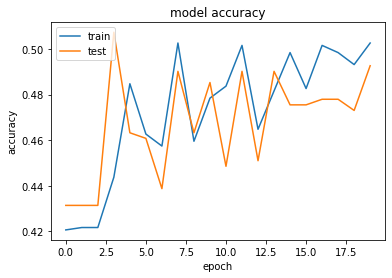

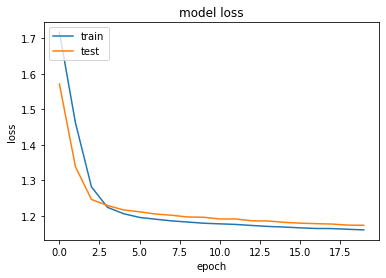

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [19]:
def train_and_test_loop3(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    model = Sequential() 
    model.add(Dense(200, input_shape = (11, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(100))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(6))
    model.add(Activation('softmax'))
    sgd = optimizers.Adam(learning_rate = lr)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])    
    # Fit the model
    history = model.fit(X_train, y_train, epochs=iterations, verbose= 1,validation_data=(X_test, y_test))
    return history

In [20]:
import math

for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop3(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
30/30 [==============================] - 2s 14ms/step - loss: 1.6313 - accuracy: 0.3985 - val_loss: 1.6876 - val_accuracy: 0.4363
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 1.3243 - accuracy: 0.5100 - val_loss: 1.5518 - val_accuracy: 0.4314
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 1.1947 - accuracy: 0.5184 - val_loss: 1.4408 - val_accuracy: 0.4485
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 1.1351 - accuracy: 0.5373 - val_loss: 1.3580 - val_accuracy: 0.4559
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 1.0810 - accuracy: 0.5321 - val_loss: 1.3006 - val_accuracy: 0.4461
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 1.0410 - accuracy: 0.5531 - val_loss: 1.2675 - val_accuracy: 0.4412
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 1.0397 - accuracy: 0.5741 - val_loss: 1.2394 - val_accuracy: 0.4412
Epoch 8/100


Epoch 59/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7693 - accuracy: 0.6677 - val_loss: 1.0558 - val_accuracy: 0.5907
Epoch 60/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7754 - accuracy: 0.6604 - val_loss: 1.0749 - val_accuracy: 0.5760
Epoch 61/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7559 - accuracy: 0.6698 - val_loss: 1.1002 - val_accuracy: 0.5858
Epoch 62/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7478 - accuracy: 0.6782 - val_loss: 1.0624 - val_accuracy: 0.5662
Epoch 63/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7378 - accuracy: 0.6824 - val_loss: 1.0584 - val_accuracy: 0.5907
Epoch 64/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7301 - accuracy: 0.6982 - val_loss: 1.1746 - val_accuracy: 0.5441
Epoch 65/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.6803 - val_loss: 1.1059 - val_accuracy: 0.5686
Epoch 

Epoch 16/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0286 - accuracy: 0.5626 - val_loss: 1.2342 - val_accuracy: 0.4167
Epoch 17/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0288 - accuracy: 0.5868 - val_loss: 1.1926 - val_accuracy: 0.4583
Epoch 18/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0423 - accuracy: 0.5689 - val_loss: 1.1781 - val_accuracy: 0.4485
Epoch 19/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0067 - accuracy: 0.5804 - val_loss: 1.1474 - val_accuracy: 0.5074
Epoch 20/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0236 - accuracy: 0.5857 - val_loss: 1.1550 - val_accuracy: 0.4657
Epoch 21/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9986 - accuracy: 0.5910 - val_loss: 1.1285 - val_accuracy: 0.5294
Epoch 22/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9930 - accuracy: 0.5973 - val_loss: 1.0906 - val_accuracy: 0.5466
Epoch 

Epoch 74/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7970 - accuracy: 0.6824 - val_loss: 1.0748 - val_accuracy: 0.5784
Epoch 75/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.6688 - val_loss: 1.1074 - val_accuracy: 0.5564
Epoch 76/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.6551 - val_loss: 1.1531 - val_accuracy: 0.5417
Epoch 77/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7935 - accuracy: 0.6572 - val_loss: 1.1393 - val_accuracy: 0.5490
Epoch 78/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7833 - accuracy: 0.6688 - val_loss: 1.1447 - val_accuracy: 0.5417
Epoch 79/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7795 - accuracy: 0.6782 - val_loss: 1.1332 - val_accuracy: 0.5368
Epoch 80/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7941 - accuracy: 0.6593 - val_loss: 1.0898 - val_accuracy: 0.5662
Epoch 

Epoch 31/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.6025 - val_loss: 1.0557 - val_accuracy: 0.5711
Epoch 32/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8864 - accuracy: 0.6078 - val_loss: 0.9905 - val_accuracy: 0.5809
Epoch 33/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8655 - accuracy: 0.6320 - val_loss: 1.1283 - val_accuracy: 0.4804
Epoch 34/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.6309 - val_loss: 1.1648 - val_accuracy: 0.5343
Epoch 35/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8515 - accuracy: 0.6278 - val_loss: 1.4068 - val_accuracy: 0.4338
Epoch 36/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.6288 - val_loss: 1.3646 - val_accuracy: 0.5368
Epoch 37/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.6383 - val_loss: 1.1325 - val_accuracy: 0.5343
Epoch 

Epoch 89/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.7182 - val_loss: 1.4594 - val_accuracy: 0.5466
Epoch 90/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7277 - val_loss: 1.5476 - val_accuracy: 0.5049
Epoch 91/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.7150 - val_loss: 2.0643 - val_accuracy: 0.4902
Epoch 92/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7424 - val_loss: 1.6841 - val_accuracy: 0.5172
Epoch 93/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.7350 - val_loss: 1.7057 - val_accuracy: 0.5049
Epoch 94/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7361 - val_loss: 1.6686 - val_accuracy: 0.5221
Epoch 95/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7277 - val_loss: 1.3801 - val_accuracy: 0.5343
Epoch 

Epoch 46/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9369 - accuracy: 0.5741 - val_loss: 1.1032 - val_accuracy: 0.5564
Epoch 47/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9341 - accuracy: 0.6004 - val_loss: 1.0225 - val_accuracy: 0.5490
Epoch 48/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9575 - accuracy: 0.5878 - val_loss: 1.0738 - val_accuracy: 0.5662
Epoch 49/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9494 - accuracy: 0.5689 - val_loss: 1.0811 - val_accuracy: 0.5294
Epoch 50/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9340 - accuracy: 0.5994 - val_loss: 1.2224 - val_accuracy: 0.4559
Epoch 51/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9345 - accuracy: 0.5952 - val_loss: 1.0589 - val_accuracy: 0.5049
Epoch 52/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9377 - accuracy: 0.5857 - val_loss: 1.0496 - val_accuracy: 0.5588
Epoch 

In [21]:
lr = 1e-4
Lambda = 2e-3
history2=train_and_test_loop3(100, lr, Lambda)

Epoch 1/100
30/30 [==============================] - 1s 7ms/step - loss: 2.2210 - accuracy: 0.1451 - val_loss: 1.7748 - val_accuracy: 0.1054
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 1.9798 - accuracy: 0.2292 - val_loss: 1.7573 - val_accuracy: 0.0147
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1.8601 - accuracy: 0.2681 - val_loss: 1.7292 - val_accuracy: 0.0392
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 1.7587 - accuracy: 0.3039 - val_loss: 1.7016 - val_accuracy: 0.1373
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 1.6793 - accuracy: 0.3333 - val_loss: 1.6701 - val_accuracy: 0.2672
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 1.6151 - accuracy: 0.3785 - val_loss: 1.6339 - val_accuracy: 0.4363
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 1.5395 - accuracy: 0.4175 - val_loss: 1.5936 - val_accuracy: 0.4657
Epoch 8/100
3

Epoch 59/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9095 - accuracy: 0.6225 - val_loss: 1.0426 - val_accuracy: 0.5662
Epoch 60/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9227 - accuracy: 0.6246 - val_loss: 1.0492 - val_accuracy: 0.5319
Epoch 61/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9228 - accuracy: 0.6141 - val_loss: 1.0495 - val_accuracy: 0.5368
Epoch 62/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8981 - accuracy: 0.6383 - val_loss: 1.0545 - val_accuracy: 0.5466
Epoch 63/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.6393 - val_loss: 1.0547 - val_accuracy: 0.5637
Epoch 64/100
30/30 [==============================] - 0s 2ms/step - loss: 0.9040 - accuracy: 0.6257 - val_loss: 1.0539 - val_accuracy: 0.5466
Epoch 65/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8976 - accuracy: 0.6393 - val_loss: 1.0457 - val_accuracy: 0.5735
Epoch 

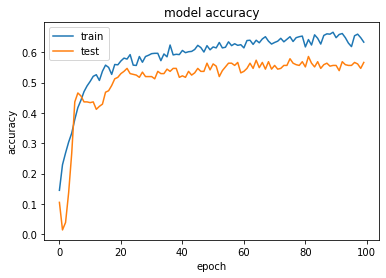

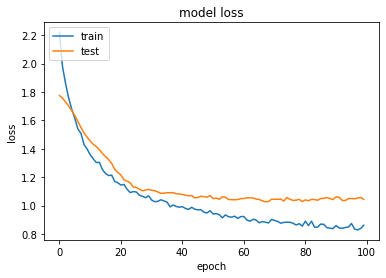

In [22]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# PART 2

In [23]:
import h5py
import numpy as np
import pandas as pd
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow

In [24]:
f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','a')

In [25]:
f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [26]:
X_train=np.array(f['X_train'])
y_train=np.array(f['y_train'])

X_test=np.array(f['X_test'])
y_test=np.array(f['y_test'])

X_val=np.array(f['X_val'])
y_val=np.array(f['y_val'])

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


Imbage 1 lable : 2 
Imbage 2 lable : 6 
Imbage 3 lable : 7 
Imbage 4 lable : 4 
Imbage 5 lable : 4 
Imbage 6 lable : 0 
Imbage 7 lable : 3 
Imbage 8 lable : 0 
Imbage 9 lable : 7 
Imbage 10 lable : 3 


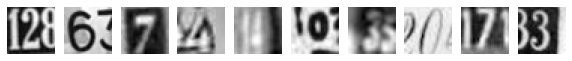

In [28]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print("Imbage {0} lable : {1} ".format(i+1,(y_train[i])))
plt.show()

# f.close() 5,9

In [29]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


In [30]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


In [31]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

In [32]:
# total Number of classes in the Dataset
print("total Number of classes in the Dataset ",np.unique(y_train))

total Number of classes in the Dataset  [0. 1.]


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Dense(256, input_shape = (1024, )))
model.add(BatchNormalization())                    
model.add(Activation('relu'))    
model.add(Dense(256))
model.add(BatchNormalization())                    
model.add(Activation('relu'))    
model.add(Dense(256))
model.add(BatchNormalization())                    
model.add(Activation('relu'))    
model.add(Dense(256))
model.add(BatchNormalization())                    
model.add(Activation('relu'))    
model.add(Dense(10))
model.add(Activation('softmax'))

In [36]:
sgd = optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
historynew = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
1313/1313 [==============================] - 5s 3ms/step - loss: 2.2178 - accuracy: 0.2182 - val_loss: 1.9402 - val_accuracy: 0.3353
Epoch 2/20
1313/1313 [==============================] - 4s 3ms/step - loss: 1.7824 - accuracy: 0.3996 - val_loss: 1.5915 - val_accuracy: 0.4833
Epoch 3/20
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5154 - accuracy: 0.5116 - val_loss: 1.3614 - val_accuracy: 0.5723
Epoch 4/20
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3373 - accuracy: 0.5720 - val_loss: 1.2115 - val_accuracy: 0.6253
Epoch 5/20
1313/1313 [==============================] - 3s 3ms/step - loss: 1.2213 - accuracy: 0.6110 - val_loss: 1.1251 - val_accuracy: 0.6496
Epoch 6/20
1313/1313 [==============================] - 3s 3ms/step - loss: 1.1492 - accuracy: 0.6317 - val_loss: 1.0558 - val_accuracy: 0.6728
Epoch 7/20
1313/1313 [==============================] - 3s 3ms/step - loss: 1.0815 - accuracy: 0.6551 - val_loss: 1.0036 - val_accuracy:

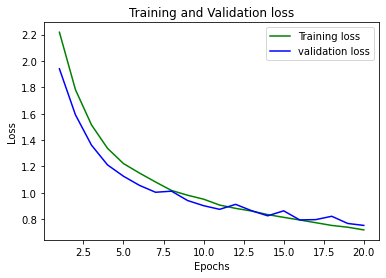

In [38]:
loss_train = historynew.history['loss']
loss_val = historynew.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* From the above plot we obeserve that learning rate is good on both Training and validation

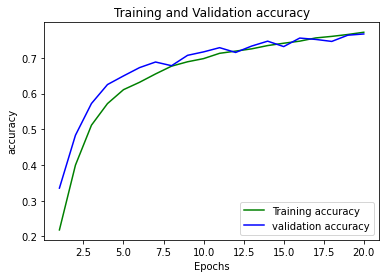

In [39]:
accuracy_train = historynew.history['accuracy']
accuracy_val = historynew.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

* From the above plot we obeserve that accuracy is good on both Training and validation

* From both the plot we observe that we need trai